<a href="https://colab.research.google.com/github/alisonsoong/NASA-SEES-Internship-2021/blob/main/EP_SEES_3_CMD_Activity_Soong_Alison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alison Soong, EP, Emergency Preparedness
CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2021 SEES.

## Welcome to the Color Magnitude Diagram (CMD) activity!

In this activity, you will be making your own color magnitude diagram of the stars in Andromeda targeted by the SPLASH survey. 

As usual with Jupyter, begin by importing the packages you'll be needing by clicking on the first cell and pressing `Ctrl+Enter` (Windows) or `Command+Ente`r (Mac). On a tablet or smartphone press the `Run` icon. For this activity, you'll only be needing numpy and matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

Because we are working in Colab, we are going to import a special package that we will use to upload and download files from and to our local computers. *This code block is not mentioned or used in the PyaR tutorial.*

In [ ]:
from google.colab import files
print("finished importing")

finished importing


In [ ]:
print("finished")

finished


This next cell is my preferred setting for making plots; I like big font and serifs! Feel free to change if you have a different preference! (Note: the original notebook author is talking about their personal font preferences here. Yours may vary.)

In [ ]:
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

This function initializes the CMD plot and labels the axes. No data is plotted in this function. You don't need to modify this function.

In [ ]:
def InitializePlot():
    plt.clf() # set up a blank/clear figure
    f= plt.figure(figsize=(8,8)) # set up the size of the plot
    plt.xlim(-1, 9) # range of the x axis
    plt.ylim(24, 18) # range of the y axis. The value physically lower is first, so 24. The value physically higher is 18, thus this graph will have an inverted y axis.
    plt.xlabel('F475W - F814W (mag)') # label of the x axis
    plt.ylabel('F814W (mag)') # label of the y axis

This function writes a catalog. It takes as arguments the name of the file,  the different quantities you want to put in the catalog, and the names of these quantities. You do not need to modify this function.

In [ ]:
def WriteCatalog(catalogName, params, paramNameString):  # create a file that has data in it
    '''
    Writes a file with the data and downloads it
    
    Parameters
    ----------
    catalogName : the name of the file
    params : the parameters, or the data
    paramNameString : header of the file
    '''

    #first, create and open the text file for writing. Choose a name: 
    catalog = open(catalogName, 'w') # built in python function, creates a blank file

    #write first row
    catalog.write('# ' + paramNameString + '\n') # built in python function, creates the header (putting in the parameter names)

    #then, loop through stars and write 1 row for each star.
    for i in range(len(params[0])): #loop over stars
        for j in range(len(params)): #loop over parameters (ra, dec, v, verr,..)
            catalog.write(str(params[j][i])) # writing the numbers as strings, which denies the compiler from rounding (which would vastly affect where we think the stars are actually located!!!)
            catalog.write(' ')
        catalog.write('\n')
    catalog.close()
    # the next statement will start a browser download of the file to your 
    # local computer
    files.download(catalogName)
    

Okay, now that we have all our packages imported, we are ready to get to the science! The first thing we need to do is read in the file that contains all our data. This file contains the coordinates (ra, dec, xi, eta), the magnitudes (in two different bandpasses), and the velocities of all our stars (we will talk more about velocities next!). 

As we discussed, the color of the star is a very useful and important quantity; we define the array for "color" below.

## Troubleshooting note
Some interns have reported that the files.upload() function does not permit file upload. It may be that your browser settings are interfering. If you are running the Colaboratory in Chrome, you can open chrome://settings/content/cookies. Look for the setting called 'Block third-party cookies'. This setting doesn't allow uploading of files in  a Colab notebook when third-party cookie blocking is enabled. Disable the setting and you should be able to upload files with the files.upload() function.

Other browsers should have similar cookie blockers that can be disabled if necessary. You probably should re-enable blockers while not coding in Colab.

Thanks to Vishruth K. a 2020 SEES intern, for solving this issue.

In [ ]:
# Be ready to interact with to code to upload the file named
# '../SIP/data/keck_hst_data.txt'
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving keck_hst_data.txt to keck_hst_data.txt
User uploaded file "keck_hst_data.txt" with length 510861 bytes


In [ ]:
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt('keck_hst_data.txt', unpack = True) # reading the file
color = f475w - f814w # the difference between the two magnitude values for the two filters.

Now we can plot a color magnitude diagram of all the objects in our sample:

<Figure size 432x288 with 0 Axes>

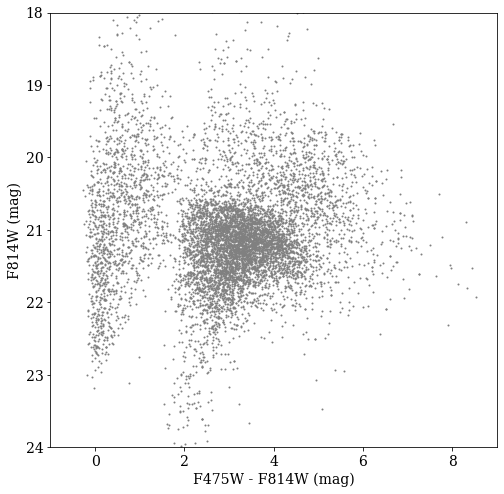

In [ ]:
f = InitializePlot() # creates a blank plot
plt.scatter(color, f814w, c = 'gray', s = 1, edgecolors = 'gray') # Creates a scatter plot. color is the x value, one of the magnitudes is the y value
# scatter function
#help(plt.scatter)

Now that we have our CMD, we want to separate out the stars of different types: main sequence (MS) stars, red giant branch (RGB) stars, and asymptotic giant branch (AGB) stars. The below cell selects the main sequence stars and plots them in blue on top of the CMD. It then writes a catalog in your "data" folder that contains the information only for the MS stars.

What you'll be doing is adapting and adding to the code below to do the same for the RGB and AGB stars. You want to color code the RGB and AGB stars on the plot, add the labels "AGB" and "RGB" to the plot, and write the RGB and AGB catalogs.

First run the cell to see the plot produced. Then, "uncomment" (meaning remove the lines with # signs--the # sign tells Python not to run the line) the line that begins "rgb=" and replace a, h, and k with numbers. To decide what numbers to choose, use the "DividedCMD" figure in your "plots" folder for inspiration. Plot your selected RGB stars, and then do the same for the AGB stars.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

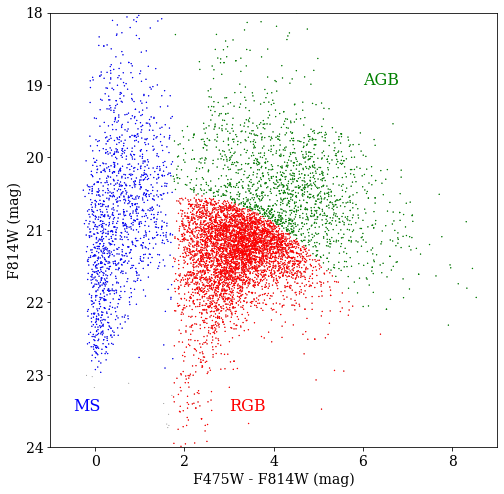

In [ ]:
#========From here on is the part that you're going to copy and
#adapt for the RGB and AGB stars===============================

#Where condition to isolate main sequence stars
ms = (color < 1.75) & (f814w < 23) # boolean array, with true/false values. 
# the color value is less than 1.75 (x axis!)
# the magnitude value is less than 23 (y axis!) Note: the y values get smaller as you go up.

#Plot MS stars in blue on the plot and label that region 
f = InitializePlot()
plt.scatter(color, f814w, c = 'gray', s = 1, edgecolors = 'none')
plt.scatter(color[ms], f814w[ms], c = 'blue', edgecolors = 'none', s = 2) # color[ms] says I only want the values of the array (the stars) where ms is true
plt.text(-0.5, 23.5, 'MS', color = 'blue', size = 16)

#Write a text file containing information for MS stars by calling the
#WriteCatalog function on the stars that satisfy the MS condition.
#You shouldn't modify the WriteCatalog function itself;
#only copy and modify the line below for the AGB and RGB groups. 
WriteCatalog('MScatalog.txt',
            [ra[ms], dec[ms], xi[ms], eta[ms], f475w[ms], f814w[ms], v[ms], verr[ms]],
            'RA DEC XI ETA F475W F814W V VERR')

# Notes on parameters and their meanings:
# Params: RA DEC XI ETA F475W F814W V VERR
# RA and DEC are coordinates (lat and long)
# XI and ETA are also coordinates, but in a different system. Relative to Andromeda Galaxy, so (0,0) is the center of Andromeda
# F475W and F814W are filters on a telescope (in this case, filters from the Hubble Space telescope)
#     Pieces of glass that go over the telescope that only lets in certain wavelengths of light. Only looking at some light that is coming from a star.
#     So we are looking at two differennt wavelength ranges
# V is velocity, km per second
# VERR is the error of the velocity in km per second

# nan = not a number; there isn't data there...

#==============================================================
#Replace a, h, and k with numbers, and see what happens 
# rgb= (color > 1.75 ) & (f814w > a*(color-h)**2.+k)
##Add the RGB stars to the plot!

#Write the catalog here when you're happy with your selection!
#Then, add the AGB stars to the plot and write an AGB catalog as well!
#==============================================================

##Add the RGB stars to the plot!
rgb= (color > 1.75 ) & (f814w > 0.1*(color-2.)**2.+20.5) # use algebra! This is a parabola, and we want it to go downwards, but we reversed the y axis, so we need a positive parabola
plt.scatter(color[rgb], f814w[rgb], c = 'red', edgecolors = 'none', s = 2)
plt.text(3, 23.5, 'RGB', color = 'red', size = 16)
WriteCatalog('RGBcatalog.txt',
            [ra[rgb], dec[rgb], xi[rgb], eta[rgb], f475w[rgb], f814w[rgb], v[rgb], verr[rgb]],
            'RA DEC XI ETA F475W F814W V VERR')

##Add the AGB stars to the plot!
agb= (color > 1.75 ) & (f814w < 0.1*(color-2.)**2.+20.5)
plt.scatter(color[agb], f814w[agb], c = 'green', edgecolors = 'none', s = 2)
plt.text(6, 19, 'AGB', color = 'green', size = 16)
WriteCatalog('AGBcatalog.txt',
            [ra[agb], dec[agb], xi[agb], eta[agb], f475w[agb], f814w[agb], v[agb], verr[agb]],
            'RA DEC XI ETA F475W F814W V VERR')

Text(3, 23.5, 'RGB')

<Figure size 432x288 with 0 Axes>

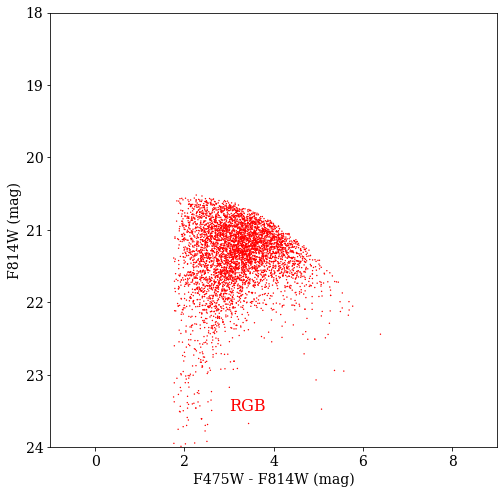

In [ ]:
f = InitializePlot()
rgb= (color > 1.75 ) & (f814w > 0.1*(color-2.)**2.+20.5) # use algebra! This is a parabola, and we want it to go downwards, but we reversed the y axis, so we need a positive parabola
##Add the RGB stars to the plot!
plt.scatter(color[rgb], f814w[rgb], c = 'red', edgecolors = 'none', s = 2)
plt.text(3, 23.5, 'RGB', color = 'red', size = 16)


Text(6, 19, 'AGB')

<Figure size 432x288 with 0 Axes>

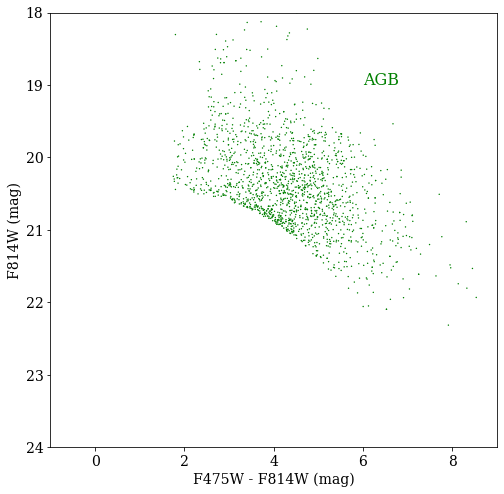

In [ ]:
f = InitializePlot()
agb= (color > 1.75 ) & (f814w < 0.1*(color-2.)**2.+20.5)
##Add the agb stars to the plot!
plt.scatter(color[agb], f814w[agb], c = 'green', edgecolors = 'none', s = 2)
plt.text(6, 19, 'AGB', color = 'green', size = 16)

In [ ]:
# Determine what fraction of the entire catalog are selected by the MS, RGB, and AGB criteria
nstars = len(color)
# ms, rgb, and agb are boolean arrays full of true and falses. true = 1, false = 0, so if you sum up the values in the array, it's sum is the number of true values
print('Fraction of stars on the MS: {0:.3f}'.format(np.sum(ms)/nstars)) # the 0:.3f rounds to 3 decimal places
print('Fraction of stars on the RGB: {0:.3f}'.format(np.sum(rgb)/nstars))
print('Fraction of stars on the AGB: {0:.3f}'.format(np.sum(agb)/nstars))
selected = ms | rgb | agb # selected is a boolean array. If it's ms, rgb, or agb, then it's true.
print('Fraction of stars not selected: {0:.3f}'.format(np.sum(~selected)/nstars)) # the ~ is bitwise not.

Fraction of stars on the MS: 0.155
Fraction of stars on the RGB: 0.513
Fraction of stars on the AGB: 0.173
Fraction of stars not selected: 0.160


# Preparing for Advanced Level Certificate
When you have successfully completed the code that writes all three star catalogs, you can prepare this notebook for submission. 

Overwrite the title text in the **CREDIT text block** at the top of the notebook. Write **your full name**, **your team code**, and **your specific team name** in the text block instead.

Make sure that your saved notebook shows your output by running all code cells.


Copy or rename notebook 3 in this way:  
* *team code_*SEES 3-CMD Activity*_last name*_*first name*.ipynb where:


1.   *team code* is your 2 character SEES team code
2.   *last name* is your last name, and
3.   *first name* is your first name


For example, a team mentor for SEES would name her notebook *EP_SEES 3-CMD Activity_Howard_Teresa.ipynb*.

Follow the directions in Basecamp to submit your notebook.